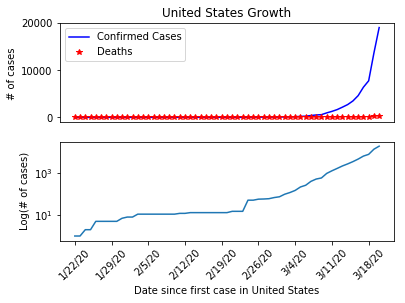

In [35]:
# Coronavirus statistical analysis - Started March 12 2013 at 10:29 PM
# Scratch code file

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

#cutting out all non-US data from dataframe
df = confirmed_df[confirmed_df['Country/Region'] == 'US']
df2 = deaths_df[deaths_df['Country/Region'] == 'US']
# Dropping all columns except dates
df_US_conf = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_US_dead = df2.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
US_conf_column_totals = df_US_conf.sum()
US_dead_column_totals = df_US_dead.sum()
#creating a new pandas DataFrame with only the US totals
US_frame_conf = {'US Total':US_conf_column_totals}
df_US_conf = pd.DataFrame(US_frame_conf)
US_frame_dead = {'US Total':US_dead_column_totals}
df_US_dead = pd.DataFrame(US_frame_dead)
# Plotting the US Data
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
fig = plt.figure()
plt.subplot(211)
plt.title('United States Growth')
plt.xticks([])
plt.ylabel('# of cases ')
plt.plot(df_US_conf,'b-', label='Confirmed Cases')
plt.plot(df_US_dead, 'r*', label='Deaths')
plt.legend()

plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_US_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_US_conf)
plt.show()

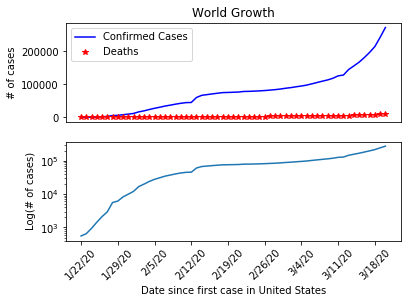

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
# Dropping all columns except dates
df_world_conf = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_world_dead = deaths_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
world_column_totals_conf = df_world_conf.sum()
world_column_totals_dead = df_world_dead.sum()
#creating a new pandas DataFrame with World totals
world_frame_conf = {'World Total':world_column_totals_conf}
df_world_conf = pd.DataFrame(world_frame_conf)
world_frame_dead = {'World Total':world_column_totals_dead}
df_world_dead = pd.DataFrame(world_frame_dead)
# Plotting the World Data
fig = plt.figure()
plt.subplot(211)
plt.title('World Growth')
plt.xticks([])
plt.ylabel('# of cases')
plt.plot(df_world_conf, 'b-', label='Confirmed Cases')
plt.plot(df_world_dead, 'r*', label='Deaths')
plt.legend()

plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_world_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_world_conf)
plt.show()

# Exponential Growth Model
### N = number of cases on a given day
### E = average number of people one infected person is exposed to in one day
### p = probability of each exposure becoming an infection
### ∆N = E*p*N, where E*p = R which is the growth factor = (daily new cases)/(previous daily new cases)
### *a ratio between two successive changes*
### So we can set the equation: N(t) = R*N0^t, where N0 is the initial value and t is the number of days since the outbreak
### but since we want to include the people already infected, we should use logistic Model
### so we'll get dN/dt = c(1-(N(t)/P))*N(t)

# Growth Factor

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

# Dropping all columns except dates
df_world = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

# summing data for each date
world_column_totals = df_world.sum()

#creating a new pandas DataFrame with World totals
world_frame = {'World Total':world_column_totals}
df_world = pd.DataFrame(world_frame)
df_world_diff = df_world.diff()
df_world_quo = df_world_diff.pct_change()
print(df_world_quo)

World Total
1/22/20          NaN
1/23/20          NaN
1/24/20     1.938776
1/25/20     0.711806
1/26/20     0.387424
1/27/20     0.182749
1/28/20     2.276885
1/29/20    -0.778197
1/30/20     2.517007
1/31/20    -0.181335
2/1/20      0.246899
2/2/20      1.249645
2/3/20     -0.348494
2/4/20      0.296380
2/5/20     -0.066816
2/6/20     -0.149880
2/7/20      0.123193
2/8/20     -0.236430
2/9/20      0.110297
2/10/20    -0.137954
2/11/20    -0.218989
2/12/20    -0.794608
2/13/20    35.150358
2/14/20    -0.569750
2/15/20    -0.670861
2/16/20     0.022844
2/17/20    -0.072926
2/18/20    -0.076696
2/19/20    -0.732162
2/20/20     0.109344
2/21/20     0.121864
2/22/20     1.805112
2/23/20    -0.780182
2/24/20     0.562176
2/25/20     0.401327
2/26/20     0.162130
2/27/20     0.383910
2/28/20     0.005151
2/29/20     0.384334
3/1/20      0.246959
3/2/20     -0.178541
3/3/20      0.308209
3/4/20     -0.100237
3/5/20      0.211404
3/6/20      0.412744
3/7/20      0.034598
3/8/20     -0.015606
3